## Compare Non-Optimized Circuit and Optimized Circuit

The algorithm used in this toturial is from [QuantumFlow](https://www.nature.com/articles/s41467-020-20729-5) (Box-2 on Page 10). 

In [1]:
try:
    import torch  
    print('Module torch was installed')
except ImportError:    
    print("Installinng torch 1.8.1")
    !pip install -q torch==1.8.1
    import qiskit  

try:
    import torchvision  
    print('Module torchvision was installed')
except ImportError:    
    print("Installinng torchvision 0.4.0")
    !pip install -q torchvision==0.4.0
    import qiskit  

try:
    import qiskit  
    print('Module qiskit was installed')
except ImportError:    
    print("Installinng qiskit 0.14.0")
    !pip install -q qiskit==0.14.0
    import qiskit  


import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import sys
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import functools
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.extensions import  UnitaryGate
from qiskit import Aer, execute
from lib_qiskit import *
import qiskit
import math

print = functools.partial(print, flush=True)

interest_num = [3,6]
ori_img_size = 28
img_size = 4
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 1
inference_batch_size = 1
data_path = '/home/hzr/Software/quantum/qc_mnist/pytorch/data'
isppd = False

Module torch was installed
Module torchvision was installed
Module qiskit was installed


In [2]:
from lib_dataloader import to_quantum_matrix,load_data

train_loader, test_loader = load_data(interest_num,data_path,isppd,img_size,batch_size,inference_batch_size,False)
for batch_idx, (data, target) in enumerate(test_loader):
    torch.set_printoptions(threshold=sys.maxsize)
    print("Batch Id: {}, Target: {}".format(batch_idx,target))
    quantum_matrix = to_quantum_matrix(data)
    break

Batch Id: 0, Target: tensor([1])


/home/hzr/anaconda3/envs/qf/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448216815/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
################ Weiwen on 12-30-2020 ################
# Parameters of the trained model
# The training procedure will be found in another repo
# https://github.com/weiwenjiang/QuantumFlow
######################################################

# Model initialization
weight_1 = torch.tensor([[1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,    1.,  1.],[-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.]])
weight_2 = torch.tensor([[1.,  -1.],[-1.,  -1.]])
# norm_flag_1 = False
# norm_para_1 = torch.tensor(0.3060)
# norm_flag_2 = False
# norm_para_2 = torch.tensor(0.6940)

### Non-optimized Circuit

The same with Tutorial 3

### Optimized Circuit

In the following, the optimized circuit (opt_circ) is created

n_qubit = 4 ,n_class = 2
Hidden layer created!


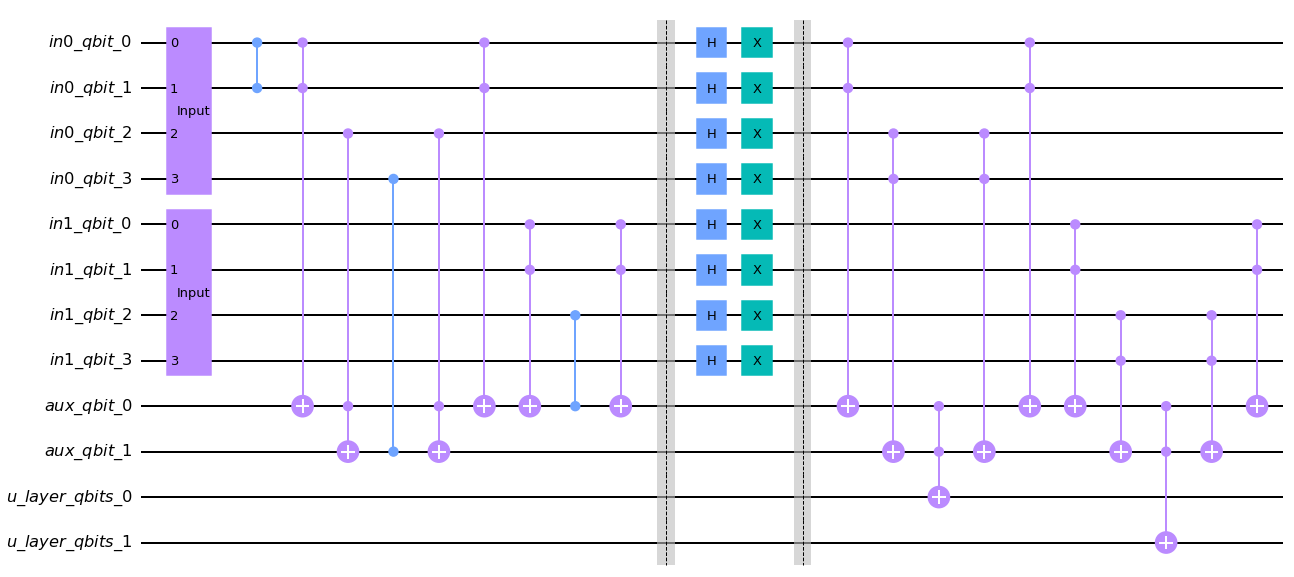

In [4]:
# Optimized circuit
u_net = UNetCircuit(16,2)
circuit = QuantumCircuit()
inps = u_net.add_in_qubits(circuit)
aux =u_net.add_aux(circuit)
out_qubits = u_net.add_out_qubits(circuit)

u_net.forward(circuit,quantum_matrix,weight_1,aux,inps,out_qubits)
print("Hidden layer created!")
circuit.draw('mpl',fold=50)



In [5]:
################ Weiwen on 12-30-2020 ################
# Quantum circuit implementation of the output layer
# fundamentals, please see our Nature Communication
# paper (P-LYR) https://arxiv.org/pdf/2006.14815.pdf
######################################################

inter_q_1 = QuantumRegister(1,"inter_q_1_qbits")
norm_q_1 = QuantumRegister(1,"norm_q_1_qbits")
out_q_1 = QuantumRegister(1,"out_q_1_qbits")
opt_circ.add_register(inter_q_1,norm_q_1,out_q_1)

opt_circ.barrier()

if weight_2_1.sum()<0:
    weight_2_1 = weight_2_1*-1
idx = 0
for idx in range(weight_2_1.flatten().size()[0]):
    if weight_2_1[idx]==-1:
        opt_circ.x(hidden_neurons[idx])
opt_circ.h(inter_q_1)
opt_circ.cz(hidden_neurons[0],inter_q_1)
opt_circ.x(inter_q_1)
opt_circ.cz(hidden_neurons[1],inter_q_1)
opt_circ.x(inter_q_1)
opt_circ.h(inter_q_1)
opt_circ.x(inter_q_1)

opt_circ.barrier()

norm_init_rad = float(norm_para_1.sqrt().arcsin()*2)
opt_circ.ry(norm_init_rad,norm_q_1)
if norm_flag_1:
    opt_circ.cx(inter_q_1,out_q_1)
    opt_circ.x(inter_q_1)
    opt_circ.ccx(inter_q_1,norm_q_1,out_q_1)
else:
    opt_circ.ccx(inter_q_1,norm_q_1,out_q_1)

for idx in range(weight_2_1.flatten().size()[0]):
    if weight_2_1[idx]==-1:
        opt_circ.x(hidden_neurons[idx])

opt_circ.barrier()




inter_q_2 = QuantumRegister(1,"inter_q_2_qbits")
norm_q_2 = QuantumRegister(1,"norm_q_2_qbits")
out_q_2 = QuantumRegister(1,"out_q_2_qbits")
opt_circ.add_register(inter_q_2,norm_q_2,out_q_2)

opt_circ.barrier()

if weight_2_2.sum()<0:
    weight_2_2 = weight_2_2*-1
idx = 0
for idx in range(weight_2_2.flatten().size()[0]):
    if weight_2_2[idx]==-1:
        opt_circ.x(hidden_neurons[idx])
opt_circ.h(inter_q_2)
opt_circ.cz(hidden_neurons[0],inter_q_2)
opt_circ.x(inter_q_2)
opt_circ.cz(hidden_neurons[1],inter_q_2)
opt_circ.x(inter_q_2)
opt_circ.h(inter_q_2)
opt_circ.x(inter_q_2)

opt_circ.barrier()

norm_init_rad = float(norm_para_2.sqrt().arcsin()*2)
opt_circ.ry(norm_init_rad,norm_q_2)
if norm_flag_2:
    opt_circ.cx(inter_q_2,out_q_2)
    opt_circ.x(inter_q_2)
    opt_circ.ccx(inter_q_2,norm_q_2,out_q_2)
else:
    opt_circ.ccx(inter_q_2,norm_q_2,out_q_2)

for idx in range(weight_2_2.flatten().size()[0]):
    if weight_2_2[idx]==-1:
        opt_circ.x(hidden_neurons[idx])

opt_circ.barrier()

c_reg = ClassicalRegister(2,"reg")
opt_circ.add_register(c_reg)
opt_circ.measure(out_q_1,c_reg[0])
opt_circ.measure(out_q_2,c_reg[1])

print("Output layer created!")

opt_circ.draw('mpl',1.0,fold =50)

NameError: name 'opt_circ' is not defined

### Non-Optimized Circuit v.s. Optimized Circuit

Let's test and compare!


In [ ]:
################ Weiwen on 12-30-2020 ################
# Quantum simulation
######################################################

# Optimized one
qc_shots=8192
opt_counts = fire_ibmq(opt_circ,qc_shots,True)
print("="*10,"Optimized Circuit","="*10)
(opt_mycount,bits) = analyze(opt_counts)
opt_class_prob=[]
for b in range(bits):
    opt_class_prob.append(float(opt_mycount[b])/qc_shots)


print("="*10,"Optimized Circuit","="*10)
print("Optimized Circuit Depth:",opt_circ.depth())
print("Result of optimized QC:",opt_class_prob)
print("Prediction class: {}".format(opt_class_prob.index(max(opt_class_prob))))
print("Target class: {}".format(target[0]))
if opt_class_prob.index(max(opt_class_prob))==target[0]:
    print("Correct prediction")
else:
    print("Incorrect prediction")
print("="*30)